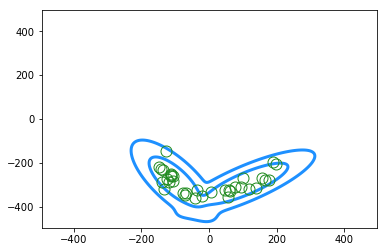

In [31]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from matplotlib import colors
import pandas
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
from scipy.stats import zscore,chi2
from sklearn import mixture
from scipy.special import erfinv

# Load all stars
df = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df.group_id.unique()
num_cands = size(names)
colsubs = flipud(cm.Spectral(linspace(0.0,1.0,num_cands)))
Cand = df.loc[df['group_id'] == names[0]]


# Get data
name = Cand.group_id.unique()[0]
nstars = size(Cand,0)
feh = Cand.feh # metallicity
vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel # velocities
x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ # positions
data = array([vx,vy,vz,x,y,z]).T

clfc = mixture.GaussianMixture(n_components=2, covariance_type='full')
clfc.fit(data)

vmin=-495.0
vmax=495.0
nfine=500
nbins_1D = 50
levels=[-6.2,-2.3,0]
RemoveOutliers = False
cmap=cm.Greens
col_hist='ForestGreen'
colp = 'ForestGreen'
col_a = 'tomato'
col_b = 'purple'
col_c = 'dodgerblue'
point_size = 8
lblsize = 28
def_alph = 0.1
vfine = linspace(vmin,vmax,nfine)
V1,V2 = meshgrid(vfine,vfine)

i = 0
j = 1
covs = clfc.covariances_
meens = clfc.means_
fv = zeros(shape=shape(V1))
if ndim(covs)>2:
    for k in range(0,shape(covs)[0]):
        U = squeeze(linalg.inv(covs[k,:,:]))
        v10 = meens[k,i]
        v20 = meens[k,j]
        U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
        V = vstack((U[i,:],U[j,:]))    
        V = delete(V, (i,j), axis=1)

        W = delete(U, (i,j), axis=0)
        W = delete(W, (i,j), axis=1)
        Ut = U0 - linalg.multi_dot([V, linalg.inv(W), V.T])
        V1o = V1-v10
        V2o = V2-v20
        Norm = (1.0/sqrt(2*pi))*sqrt(linalg.det(W))   
        fv += Norm*exp(-0.5*(V1o**2.0*Ut[0,0]+V2o**2.0*Ut[1,1]+2*V1o*V2o*Ut[1,0]))   
fv = log(fv)
fv = fv-amax(fv)


plt.plot(vx,vy,'o',markersize=point_size+3,markerfacecolor='none',markeredgecolor=colp,label='Outliers')
plt.contour(vfine,vfine,fv,levels=levels,colors=col_c,linewidths=3,linestyles='solid')
plt.show()


In [29]:
U0-linalg.multi_dot([V, linalg.inv(W), V.T])

array([[ 0.00091085, -0.00099331],
       [-0.00099331,  0.00161159]])

In [25]:
for i in range(0,6):
    print U[i,:]

[ 0.00286481  0.00298631  0.00100815 -0.05580987 -0.02372455  0.02492401]
[ 0.00298631  0.00482149  0.00137519 -0.10454929 -0.03257076  0.04356885]
[ 0.00100815  0.00137519  0.00128302 -0.03574663 -0.03309625  0.02651975]
[-0.05580987 -0.10454929 -0.03574663  2.70294548  0.95899009 -1.16562542]
[-0.02372455 -0.03257076 -0.03309625  0.95899009  2.15191723 -0.99087929]
[ 0.02492401  0.04356885  0.02651975 -1.16562542 -0.99087929  0.99588093]


In [26]:
V

array([[ 0.00298631, -0.05580987, -0.02372455,  0.02492401],
       [ 0.00482149, -0.10454929, -0.03257076,  0.04356885]])